In [3]:
#Importing Libraries 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
import cv2


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.activations import relu
from tensorflow.keras.activations import softmax
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping



from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle




In [5]:
# Creating Train / Test

X_train = []
y_train = []

image_size = 150
 
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

for i in labels:
    image_path = os.path.join('../input/brain-tumor-mri-dataset/Training',i)
    for j in os.listdir(image_path):
        img = cv2.imread(os.path.join(image_path,j))
        if img is None:
            print(os.path.join(image_path,j))
            continue
        else:
            img =  cv2.resize(img,(150,150))
            X_train.append(img)
            y_train.append(i)


for i in labels:
    image_path = os.path.join('../input/brain-tumor-mri-dataset/Testing',i)
    for j in os.listdir(image_path):
        img = cv2.imread(os.path.join(image_path,j))
        if img is None:
            continue
        else:
            img =  cv2.resize(img,(150,150))
            X_train.append(img)
            y_train.append(i)

X_train = np.array(X_train)
y_train = np.array(y_train)



In [6]:
# Shuffing X_train/y_train (Do not shuffle them separately)
X_train, y_train = shuffle(X_train,y_train,random_state=101)


In [8]:
X_train,X_test,y_train,y_test  =train_test_split(X_train,y_train,test_size=0.2, random_state=101)

In [9]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5618, 150, 150, 3)
(5618,)
(1405, 150, 150, 3)
(1405,)


In [11]:
# Assigning values to y_train
y_train_val = []
for i in y_train:
    y_train_val.append(labels.index(i))
y_train = y_train_val
    

In [12]:
y_train = tf.keras.utils.to_categorical(y_train)
y_train

array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]])

In [13]:
# Assigning values to y_test
y_test_val = []

for i in y_test:
    y_test_val.append(labels.index(i))
y_test = y_test_val
    

In [14]:
# Converting into categorically variable
y_test = tf.keras.utils.to_categorical(y_test)
print(y_test)

[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]


In [92]:

# Creating model
cnn = tf.keras.models.Sequential()

#Adding Layers to model
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3,activation = relu, input_shape = (150,150,3),padding = 'same'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 3,activation = relu,padding = 'same'))
cnn.add(tf.keras.layers.BatchNormalization())


cnn.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2),strides  = 2))
cnn.add(tf.keras.layers.Dropout(0.2))

cnn.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 3,activation = relu,padding = 'same'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 3,activation = relu,padding = 'same'))
cnn.add(tf.keras.layers.BatchNormalization())


cnn.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2),strides  = 2))
cnn.add(tf.keras.layers.Dropout(0.2))

cnn.add(tf.keras.layers.Conv2D(filters = 128, kernel_size = 3,activation = relu,padding = 'same'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.Conv2D(filters = 128, kernel_size = 3,activation = relu,padding = 'same'))
cnn.add(tf.keras.layers.BatchNormalization())


cnn.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2),strides  = 2))
cnn.add(tf.keras.layers.Dropout(0.2))

cnn.add(tf.keras.layers.Conv2D(filters = 128, kernel_size = 3,activation = relu,padding = 'same'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.Conv2D(filters = 256, kernel_size = 3,activation = relu,padding = 'same'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.Conv2D(filters = 256, kernel_size = 3,activation = relu,padding = 'same'))
cnn.add(tf.keras.layers.BatchNormalization())



cnn.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2),strides  = 2))
cnn.add(tf.keras.layers.Dropout(0.2))

cnn.add(tf.keras.layers.Flatten())


cnn.add(tf.keras.layers.Dense(256,activation = relu))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.Dense(64,activation = relu))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.Dense(4,activation = 'softmax'))





In [79]:
# Adding Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
optimizer = Adam(learning_rate=0.0001)
#Complie model
cnn.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [63]:
cnn.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_54 (Conv2D)              │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 150, 150, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_55 (Conv2D)              │ (None, 150, 150, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 150, 150, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_56 (Conv2D)              │ (None, 75, 75, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 75, 75, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_57 (Conv2D)              │ (None, 75, 75, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 75, 75, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_58 (Conv2D)              │ (None, 37, 37, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 37, 37, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_59 (Conv2D)              │ (None, 37, 37, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 37, 37, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_60 (Conv2D)              │ (None, 18, 18, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 18, 18, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_61 (Conv2D)              │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 6,678,660 (25.48 MB)

 Trainable params: 6,675,780 (25.47 MB)

 Non-trainable params: 2,880 (11.25 KB)

In [65]:
history = cnn.fit(X_train,y_train,epochs=15,validation_split=0.2,callbacks=[early_stopping])

Epoch 1/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 34s 133ms/step - accuracy: 0.8160 - loss: 0.4739 - val_accuracy: 0.7598 - val_loss: 0.7438
Epoch 2/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - accuracy: 0.8729 - loss: 0.3449 - val_accuracy: 0.7696 - val_loss: 0.7159
Epoch 3/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - accuracy: 0.9031 - loss: 0.2621 - val_accuracy: 0.6557 - val_loss: 1.3268
Epoch 4/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - accuracy: 0.9217 - loss: 0.2333 - val_accuracy: 0.7785 - val_loss: 0.6728
Epoch 5/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - accuracy: 0.9419 - loss: 0.1689 - val_accuracy: 0.8345 - val_loss: 0.4128
Epoch 6/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - accuracy: 0.9491 - loss: 0.1470 - val_accuracy: 0.8407 - val_loss: 0.4719
Epoch 7/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - accuracy: 0.9667 - loss: 0.1110 - val_accuracy: 0.9244 - val_loss: 0.2287
Epoch 8/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - accuracy: 0.9714 - loss: 0.0925 - val_ac

[]

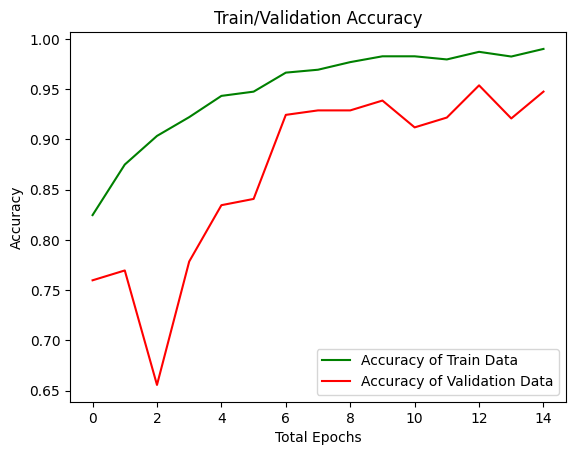

In [66]:
epochs = range(len(history.history['accuracy']))
plt.plot(epochs, history.history['accuracy'], color = 'green', label = 'Accuracy of Train Data')
plt.plot(epochs, history.history['val_accuracy'], color = 'red', label = 'Accuracy of Validation Data')
plt.xlabel('Total Epochs')
plt.ylabel('Accuracy')
plt.title('Train/Validation Accuracy')
plt.legend(loc = 0)
plt.plot()

[]

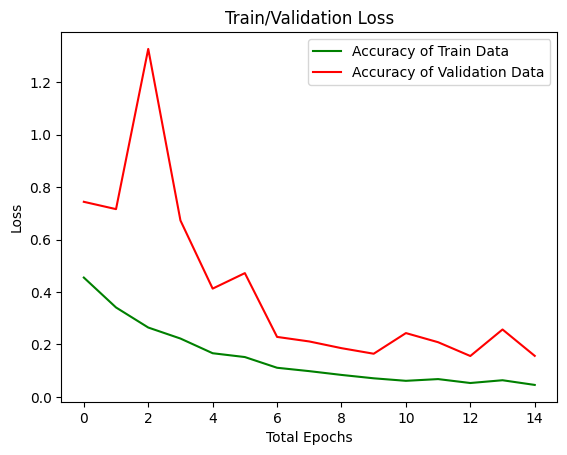

In [67]:
epochs = range(len(history.history['loss']))
plt.plot(epochs, history.history['loss'], color = 'green', label = 'Accuracy of Train Data')
plt.plot(epochs, history.history['val_loss'], color = 'red', label = 'Accuracy of Validation Data')
plt.xlabel('Total Epochs')
plt.ylabel('Loss')
plt.title('Train/Validation Loss')
plt.legend(loc = 0)
plt.plot()

(1, 150, 150, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[0]
glioma


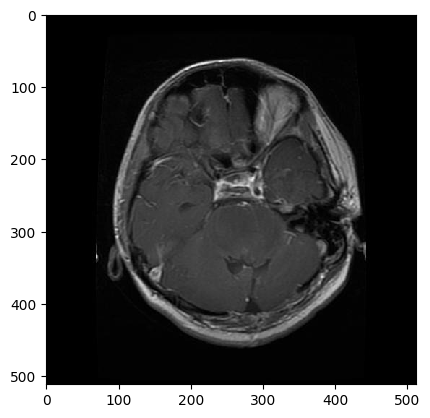

In [69]:
from tensorflow.keras.preprocessing import image
img = cv2.imread('/dataset/Testing/glioma/Te-gl_0010.jpg')
img = cv2.resize(img,(150,150))
img_arr =  np.array(img)
img_arr  = img_arr.reshape(1,150,150,3)
print(img_arr.shape)


img= image.load_img('/dataset/Testing/glioma/Te-gl_0010.jpg')
plt.imshow(img,interpolation='nearest')


result4 = np.argmax(cnn.predict(img_arr),axis=1)
print(result4)
print(labels[result4[0]])

(1, 150, 150, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[3]
pituitary


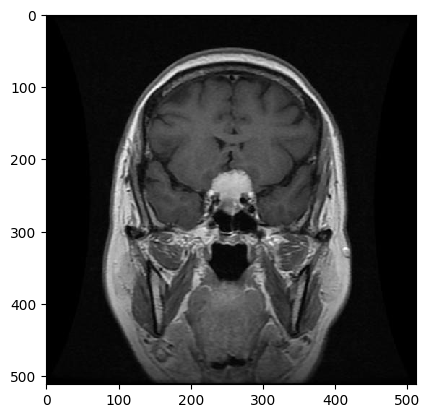

In [72]:
from tensorflow.keras.preprocessing import image
img = cv2.imread('/dataset/Testing/pituitary/Te-piTr_0002.jpg')
img = cv2.resize(img,(150,150))
img_arr =  np.array(img)
img_arr  = img_arr.reshape(1,150,150,3)
print(img_arr.shape)


img= image.load_img('/dataset/Testing/pituitary/Te-piTr_0002.jpg')
plt.imshow(img,interpolation='nearest')


result4 = np.argmax(cnn.predict(img_arr),axis=1)
print(result4)
print(labels[result4[0]])

(1, 150, 150, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[2]
notumor


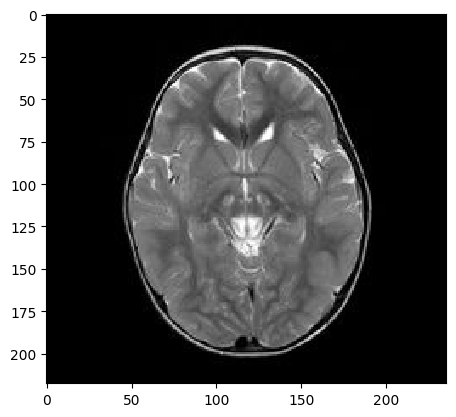

In [74]:

img = cv2.imread('/dataset/Testing/notumor/Te-no_0016.jpg')
img = cv2.resize(img,(150,150))
img_arr =  np.array(img)
img_arr  = img_arr.reshape(1,150,150,3)
print(img_arr.shape)


img= image.load_img('/dataset/Testing/notumor/Te-no_0016.jpg')
plt.imshow(img,interpolation='nearest')


result4 = np.argmax(cnn.predict(img_arr),axis=1)
print(result4)
print(labels[result4[0]])

In [82]:
# Get Predictions
preds = cnn.predict(X_test)
y_pred = np.argmax(preds, axis=1) 

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


In [87]:
print(y_pred)

[3 2 0 ... 3 0 3]


In [88]:
# Converting into categorically variable
y_pred = tf.keras.utils.to_categorical(y_pred)

In [89]:
print(y_pred)

[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]


In [90]:
from sklearn.metrics import classification_report
# Classification report
print(classification_report(y_test, y_pred, target_names= classes))

              precision    recall  f1-score   support

      glioma       0.93      0.96      0.94       348
  meningioma       0.96      0.87      0.91       329
     notumor       0.99      0.99      0.99       411
   pituitary       0.94      1.00      0.97       317

   micro avg       0.96      0.96      0.96      1405
   macro avg       0.96      0.96      0.95      1405
weighted avg       0.96      0.96      0.96      1405
 samples avg       0.96      0.96      0.96      1405



In [80]:
#Save the model
cnn.save('Brain_Tumor_vgg.h5')